In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Считываем данные

In [314]:
ledocol = pd.read_excel('ledocol.xlsx', index_col=0)

ledocol

,IMO
Наименование,
50 лет Победы,9152959
Ямал,9077549
Таймыр,8417481
Вайгач,8417493


In [33]:
requests = pd.read_excel('request.xlsx',
                         parse_dates=['Дата и время начала плавания', 'Дата и время окончания плавания'],
                         date_format= "%d.%m.%y %H:%M"
                        )

requests.columns = ['name', 'IMO', 'ice_class', 'speed', 'start', 'end', 'start_time', 'end_time']

for coord in 'start', 'end':
    requests[coord] = requests[coord].map(lambda x: 13 if x == 'точка в Баренцевом море' else int(x.split()[-1]))

def ice_class_to_num(ice_class):
    if ice_class in ('Arc7', 'Arc8', 'Arc9'):
        return 9
    elif ice_class in ('Arc4', 'Arc5', 'Arc6'):
        return 6
    else:
        return 3

requests.ice_class = requests.ice_class.map(ice_class_to_num)

requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
0,Штурман Альбанов,9752084,9,15,13,3,01.01.21 23:30,05.01.21 5:00
1,Штурман Альбанов,9752084,9,15,3,13,06.01.21 11:00,10.01.21 18:00
2,Штурман Альбанов,9752084,9,15,13,3,12.01.21 18:00,16.01.21 22:00
3,Штурман Альбанов,9752084,9,15,3,13,17.01.21 6:00,21.01.21 20:45
4,Штурман Альбанов,9752084,9,15,13,3,21.01.21 9:00,26.01.21 22:00
5,Штурман Альбанов,9752084,9,15,3,13,28.01.21 1:00,02.02.21 19:00
6,Штурман Кошелев,9759939,9,15,3,13,02.01.21 20:30,06.01.21 7:00
7,Штурман Кошелев,9759939,9,15,13,3,07.01.21 19:00,11.01.21 3:20
8,Штурман Кошелев,9759939,9,15,3,13,13.01.21 16:00,17.01.21 14:00
9,Штурман Кошелев,9759939,9,15,13,3,17.01.21 13:00,21.01.21 16:20


In [4]:
cohesion = pd.read_excel('led_tol.xlsx', index_col=0)

def ice_cohesion_to_num(ice_cohesion):
    if ice_cohesion <= 3:
        return 3
    elif ice_cohesion <= 6:
        return 6
    return 9

cohesion = cohesion.map(ice_cohesion_to_num)

cohesion

,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6
3,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,...,3,3,6,6,6,6,6,6,6,6
7,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,9
8,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,9,9
9,3,3,3,3,3,3,3,3,6,6,...,6,6,9,9,9,9,9,9,9,9
10,3,3,3,3,3,3,3,6,6,6,...,6,9,9,9,9,9,9,9,9,9


In [5]:
availability = pd.read_excel('ledocol_led.xlsx', index_col=0)

availability

,50 лет Победы,Ямал,Таймыр,Вайгач
Номер ребра,,,,
1,1,1,1,1
2,1,1,1,1
3,1,1,1,1
4,1,1,1,1
5,1,1,1,1
6,1,1,1,1
7,1,1,1,1
8,1,1,1,1
9,1,1,1,1


# Логика работы
Будем действовать из принципа, что есть линейные участки, а есть перекрётки.
Также заметим, что корабли плывут либо в море, либо из моря, это сильно поможет.
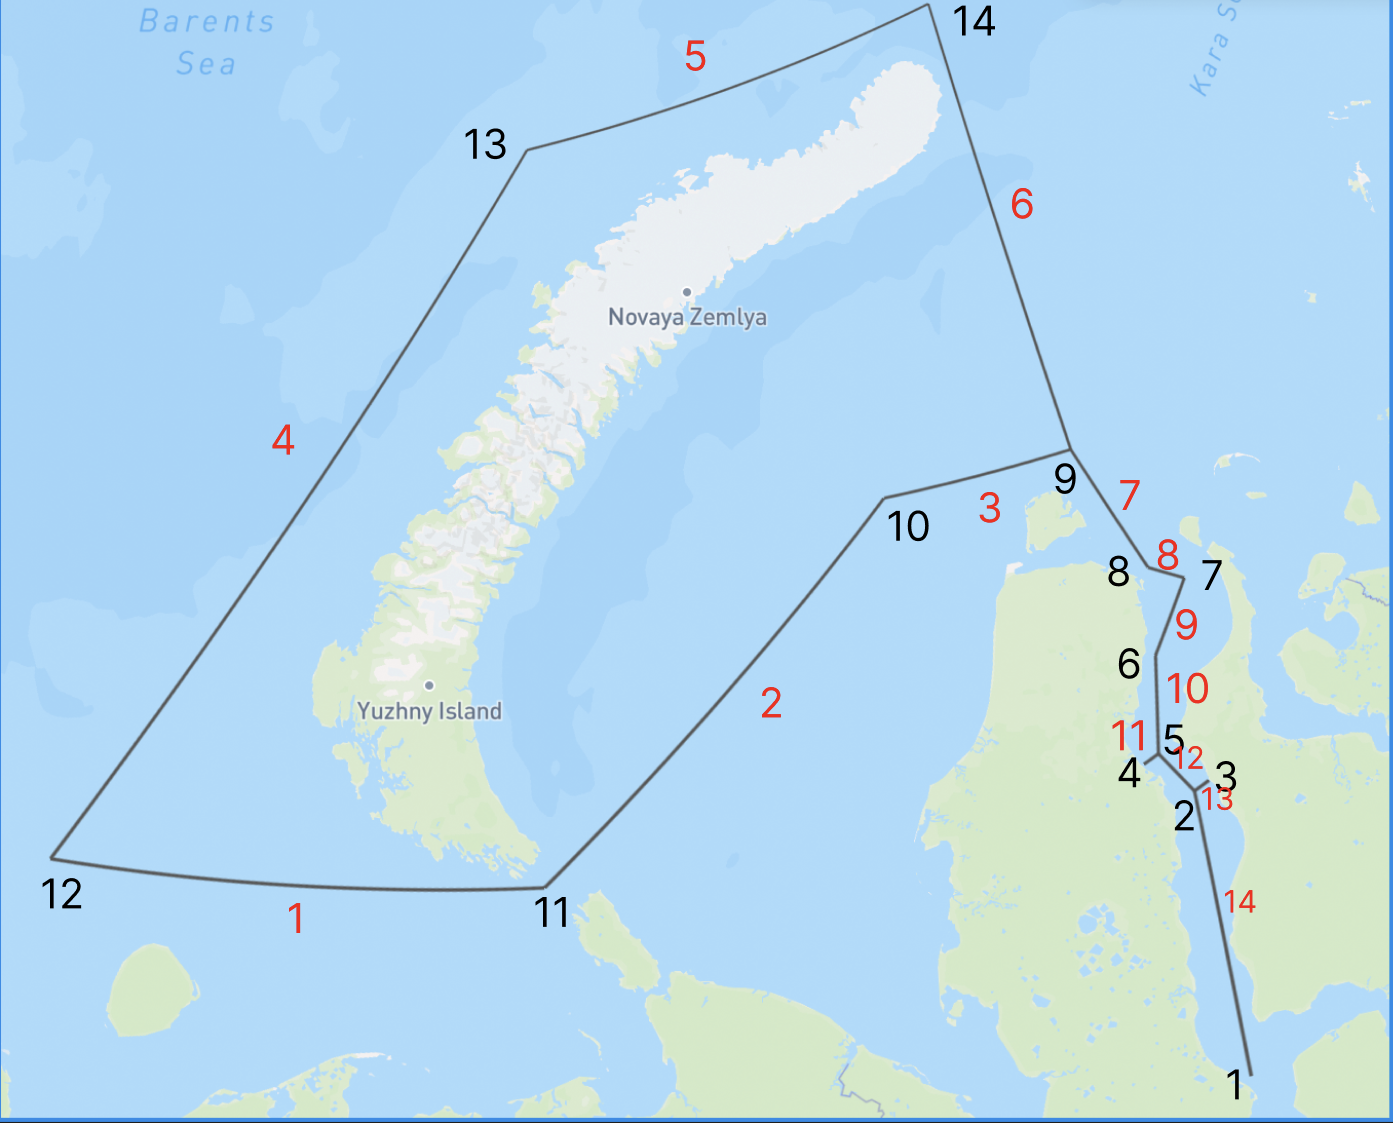
Выделим точки, в которых корабли могут встречаться и расходиться - это перекрёстки `2, 5, 9`
Маршрут строим следующим образом - собираем корабли в этих точках, если они неспособны двигаться сами, и оттуда уже выдвигаемся с ледоколом.
В качестве точки в Баренцевом море будем считать точку `13`

In [6]:
dot_to_edge = {
    1 : {14},
    2 : {12, 13, 14},
    3 : {13},
    4 : {12, 11, 10},
    5 : {11},
    6 : {10, 9},
    7 : {9, 8},
    8 : {8, 7},
    9 : {7, 6, 3},
    10 : {3, 2},
    11 : {2, 1},
    12 : {1, 4},
    13 : {4, 5},
    14 : {5, 6}
}

edge_to_dot = {
    1: {11, 12},
    2: {10, 11},
    3: {9, 10},
    4: {12, 13},
    5: {13, 14},
    6: {9, 14},
    7: {8, 9},
    8: {7, 8},
    9: {6, 7},
    10: {4, 6},
    11: {4, 5},
    12: {2, 4},
    13: {2, 3},
    14: {1, 2}
}

dist = {
    1: 215.16416724886025,
    2: 261.2195893541316,
    3: 70.85270491892756,
    4: 414.1149630578018,
    5: 173.3405451002353,
    6: 234.37207017355294,
    7: 62.16654544448847,
    8: 21.835836752582637,
    9: 47.241955730302784,
    10: 46.48764447282277,
    11: 9.262398887445135,
    12: 19.76249919505339,
    13: 9.523092177033249,
    14: 140.25547793936343
}

In [7]:
def speed_from_cohesion(speed, cohesion, ledocol=False):
    """Зависимость скорости от ледяной обстановки"""
    return 9 if ledocol else speed * (1 - 0.07 * cohesion)

def can_swim(name, edge, date):
    """1 == самостоятельно
    0 == проводка
    -1 == запрещено"""    
    ice_class = requests[requests.name == name].ice_class.iloc[0]
    ice_cohesion = cohesion.loc[edge, str(date.day)]
    
    if ice_cohesion <= ice_class:
        return 1
    elif ice_cohesion <= ice_class + 3:
        return 0
    return -1

In [ ]:
# отсеиваем заявки с хорошими басами льда так как они могут идти са

In [34]:
requests = requests.query('ice_class != 9')
requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
12,Лагорта,9194012,6,15,13,3,27.12.20 23:00,07.01.21 17:00
13,Лагорта,9194012,6,15,3,13,20.01.21 15:00,30.01.21 22:00
24,Арктика-2,9243801,6,14,13,2,13.01.21 1:30,16.01.21 9:30
25,Арктика-2,9243801,6,14,2,13,24.01.21 21:00,28.01.21 21:00
26,РЗК Константа,8711289,6,15,2,13,29.12.20 15:00,02.01.21 19:30
27,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
28,РЗК Константа,8711289,6,15,1,13,19.01.21 4:00,22.01.21 18:00
29,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
30,Беринг,9267297,6,14,13,2,24.01.21 10:00,28.01.21 22:00
31,Северный проект,9202053,6,12,13,2,23.01.21 0:30,30.01.21 21:00


In [35]:
requests.shape

(25, 8)

In [36]:
requests = requests.sort_values(by='start_time')
requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
41,LNG DUBHE,9834296,3,16,13,1,02.01.21 0:30,03.01.21 23:30
37,LNG PHECDA,9834313,3,18,13,1,02.01.21 12:30,04.01.21 12:00
38,LNG PHECDA,9834313,3,18,1,13,04.01.21 11:00,06.01.21 14:00
29,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
42,LNG DUBHE,9834296,3,16,1,13,06.01.21 15:00,08.01.21 16:00
27,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
43,LNG DUBHE,9834296,3,16,13,1,12.01.21 10:00,14.01.21 16:30
44,LNG DUBHE,9834296,3,16,1,13,13.01.21 19:30,15.01.21 10:00
24,Арктика-2,9243801,6,14,13,2,13.01.21 1:30,16.01.21 9:30
33,Мыс Желания,9366110,6,16,2,13,16.01.021 12:30,19.01.21 22:00


In [ ]:
# загоняет данные с прошлого года в начало

In [37]:
requests = requests.drop([12, 26, 32])
requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
41,LNG DUBHE,9834296,3,16,13,1,02.01.21 0:30,03.01.21 23:30
37,LNG PHECDA,9834313,3,18,13,1,02.01.21 12:30,04.01.21 12:00
38,LNG PHECDA,9834313,3,18,1,13,04.01.21 11:00,06.01.21 14:00
29,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
42,LNG DUBHE,9834296,3,16,1,13,06.01.21 15:00,08.01.21 16:00
27,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
43,LNG DUBHE,9834296,3,16,13,1,12.01.21 10:00,14.01.21 16:30
44,LNG DUBHE,9834296,3,16,1,13,13.01.21 19:30,15.01.21 10:00
24,Арктика-2,9243801,6,14,13,2,13.01.21 1:30,16.01.21 9:30
33,Мыс Желания,9366110,6,16,2,13,16.01.021 12:30,19.01.21 22:00


In [38]:
requests.loc[-1] = ['Мыс Желания',	9366110,	6,	16,	13,	2,	'31.12.20 12:00',	'02.01.21 12:00']
requests.index = requests.index + 1  
requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
42,LNG DUBHE,9834296,3,16,13,1,02.01.21 0:30,03.01.21 23:30
38,LNG PHECDA,9834313,3,18,13,1,02.01.21 12:30,04.01.21 12:00
39,LNG PHECDA,9834313,3,18,1,13,04.01.21 11:00,06.01.21 14:00
30,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
43,LNG DUBHE,9834296,3,16,1,13,06.01.21 15:00,08.01.21 16:00
28,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
44,LNG DUBHE,9834296,3,16,13,1,12.01.21 10:00,14.01.21 16:30
45,LNG DUBHE,9834296,3,16,1,13,13.01.21 19:30,15.01.21 10:00
25,Арктика-2,9243801,6,14,13,2,13.01.21 1:30,16.01.21 9:30
34,Мыс Желания,9366110,6,16,2,13,16.01.021 12:30,19.01.21 22:00


In [39]:
requests = requests.drop(0)
requests

,name,IMO,ice_class,speed,start,end,start_time,end_time
42,LNG DUBHE,9834296,3,16,13,1,02.01.21 0:30,03.01.21 23:30
38,LNG PHECDA,9834313,3,18,13,1,02.01.21 12:30,04.01.21 12:00
39,LNG PHECDA,9834313,3,18,1,13,04.01.21 11:00,06.01.21 14:00
30,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
43,LNG DUBHE,9834296,3,16,1,13,06.01.21 15:00,08.01.21 16:00
28,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
44,LNG DUBHE,9834296,3,16,13,1,12.01.21 10:00,14.01.21 16:30
45,LNG DUBHE,9834296,3,16,1,13,13.01.21 19:30,15.01.21 10:00
25,Арктика-2,9243801,6,14,13,2,13.01.21 1:30,16.01.21 9:30
34,Мыс Желания,9366110,6,16,2,13,16.01.021 12:30,19.01.21 22:00


In [44]:
data = []
			
data.insert(0, {'name' : 'Лагорта', 'IMO'	: 9194012, 	'ice_class' : 6, 'speed' :	15, 'start' :	13, 'end':	3,	'start_time' : '27.12.20 23:00', 'end_time' :	'07.01.21 17:00'})

requests_new = pd.concat([pd.DataFrame(data), requests_new], ignore_index=True) 

requests_new


,name,IMO,ice_class,speed,start,end,start_time,end_time
0,Лагорта,9194012,6,15,13,3,27.12.20 23:00,07.01.21 17:00
1,РЗК Константа,8711289,6,15,2,13,29.12.20 15:00,02.01.21 19:30
2,Мыс Желания,9366110,6,16,13,2,31.12.20 12:00,02.01.21 12:00
3,LNG DUBHE,9834296,3,16,13,1,02.01.21 0:30,03.01.21 23:30
4,LNG PHECDA,9834313,3,18,13,1,02.01.21 12:30,04.01.21 12:00
5,LNG PHECDA,9834313,3,18,1,13,04.01.21 11:00,06.01.21 14:00
6,Беринг,9267297,6,14,2,13,05.01.21 21:00,08.01.21 10:00
7,LNG DUBHE,9834296,3,16,1,13,06.01.21 15:00,08.01.21 16:00
8,РЗК Константа,8711289,6,15,13,1,09.01.21 3:00,13.01.21 21:30
9,LNG DUBHE,9834296,3,16,13,1,12.01.21 10:00,14.01.21 16:30


In [45]:
requests_new.shape

(25, 8)

In [46]:
requests_new.to_csv('requests_new.csv')

In [117]:
cohesion['31'] = cohesion['30']
cohesion

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6
3,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,6,6
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,...,3,6,6,6,6,6,6,6,6,6
7,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,6,9,9
8,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,6,6,9,9,9
9,3,3,3,3,3,3,3,3,6,6,...,6,9,9,9,9,9,9,9,9,9
10,3,3,3,3,3,3,3,6,6,6,...,9,9,9,9,9,9,9,9,9,9


In [130]:
cohesion['-30'] = cohesion['1']
cohesion['-28'] = cohesion['1']
cohesion

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,-31,-29,-27,-30,-28
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
5,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
6,3,3,3,3,3,3,3,3,3,3,...,6,6,6,6,6,3,3,3,3,3
7,3,3,3,3,3,3,3,3,3,3,...,6,6,6,9,9,3,3,3,3,3
8,3,3,3,3,3,3,3,3,3,3,...,6,6,9,9,9,3,3,3,3,3
9,3,3,3,3,3,3,3,3,6,6,...,9,9,9,9,9,3,3,3,3,3
10,3,3,3,3,3,3,3,6,6,6,...,9,9,9,9,9,3,3,3,3,3


In [84]:
ways = {
    (1, 13): [(14, 12, 10, 9, 8, 7, 3, 2, 1, 4), (14, 12, 10, 9, 8, 7, 6, 5)],
    (13, 1): [(4, 1, 2, 3, 7, 8, 9, 10, 12, 14), (5, 6, 7, 8, 9, 10, 12, 14)],
    (3, 13): [(13, 12, 10, 9, 8, 7, 3, 2, 1, 4), (13, 12, 10, 9, 8, 7, 6, 5)],
    (13, 3): [(4, 1, 2, 3, 7, 8, 9, 10, 12, 13), (5, 6, 7, 8, 9, 10, 12, 13)],
    (4, 13): [(11, 10, 9, 8, 7, 3, 2, 1, 4), (11, 10, 9, 8, 7, 6, 5)],
    (13, 4): [(4, 1, 2, 3, 7, 8, 9, 10, 11), (5, 6, 7, 8, 9, 10, 11)]
}

In [103]:
requests.dtypes

name          object
IMO            int64
ice_class      int64
speed          int64
start          int64
end            int64
start_time    object
end_time      object
dtype: object

In [106]:
def time(date_str):
    return pd.to_datetime(date_str)





In [108]:
requests_new['end_time'] = requests_new['end_time'].map(lambda end_time: time(end_time))
requests_new


,name,IMO,ice_class,speed,start,end,start_time,end_time
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00
2,Мыс Желания,9366110,6,16,13,3,2020-12-31 12:00:00,2021-01-02 12:00:00
3,LNG DUBHE,9834296,3,16,13,1,2021-01-02 00:30:00,2021-01-03 23:30:00
4,LNG PHECDA,9834313,3,18,13,1,2021-01-02 12:30:00,2021-01-04 12:00:00
5,LNG PHECDA,9834313,3,18,1,13,2021-01-04 11:00:00,2021-01-06 14:00:00
6,Беринг,9267297,6,14,3,13,2021-01-05 21:00:00,2021-01-08 10:00:00
7,LNG DUBHE,9834296,3,16,1,13,2021-01-06 15:00:00,2021-01-08 16:00:00
8,РЗК Константа,8711289,6,15,13,1,2021-01-09 03:00:00,2021-01-13 21:30:00
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00


In [64]:
requests_new['end_time'] = requests_new['end_time'].map(lambda end_time: time(end_time))

In [101]:
requests_new.to_csv('requests_new.csv')

In [98]:
def new(x):
    if x == 2:
        return 3
    elif x == 3:
        return 4
    elif x == 1 : 
        return 1
    else:
        return 13

In [259]:
requests_new = pd.read_csv('requests_new.csv')
requests_new.drop(requests_new.columns[0], axis=1, 
        inplace=True)

#requests_new['end_time'] = requests_new['end_time'].map(lambda end_time: time(end_time))
#requests_new['start_time'] = requests_new['start_time'].map(lambda start_time: time(start_time))

requests_new['start_time'] = pd.to_datetime(requests_new['start_time'])
requests_new['end_time'] = pd.to_datetime(requests_new['end_time'])


requests_new

,name,IMO,ice_class,speed,start,end,start_time,end_time
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00
2,Мыс Желания,9366110,6,16,13,3,2020-12-31 12:00:00,2021-01-02 12:00:00
3,LNG DUBHE,9834296,3,16,13,1,2021-01-02 00:30:00,2021-01-03 23:30:00
4,LNG PHECDA,9834313,3,18,13,1,2021-01-02 12:30:00,2021-01-04 12:00:00
5,LNG PHECDA,9834313,3,18,1,13,2021-01-04 11:00:00,2021-01-06 14:00:00
6,Беринг,9267297,6,14,3,13,2021-01-05 21:00:00,2021-01-08 10:00:00
7,LNG DUBHE,9834296,3,16,1,13,2021-01-06 15:00:00,2021-01-08 16:00:00
8,РЗК Константа,8711289,6,15,13,1,2021-01-09 03:00:00,2021-01-13 21:30:00
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00


In [186]:
def way_to_time(way, ship, ledocol=False):
    time = ship.start_time
    past_year = False
    if time.year == 2020:
        past_year = True
    for edge in way:
        if past_year & time.year != 2020:
           past_year = False 
        if past_year: 
            ice_cohesion = cohesion.loc[edge, '-' + str(time.day)]
        else:
            ice_cohesion = cohesion.loc[edge, str(time.day)]
        if ice_cohesion > ship.ice_class:
            return 'cant'
        #print(edge)
        #print(speed_from_cohesion(ship.speed, ice_cohesion, ledocol))
        time += timedelta(hours= dist[edge] / speed_from_cohesion(ship.speed, ice_cohesion, ledocol))
    return time

In [232]:
requests_new['time'] = 0
requests_new

,name,IMO,ice_class,speed,start,end,start_time,end_time,time
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00,0
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00,0
2,Мыс Желания,9366110,6,16,13,3,2020-12-31 12:00:00,2021-01-02 12:00:00,0
3,LNG DUBHE,9834296,3,16,13,1,2021-01-02 00:30:00,2021-01-03 23:30:00,0
4,LNG PHECDA,9834313,3,18,13,1,2021-01-02 12:30:00,2021-01-04 12:00:00,0
5,LNG PHECDA,9834313,3,18,1,13,2021-01-04 11:00:00,2021-01-06 14:00:00,0
6,Беринг,9267297,6,14,3,13,2021-01-05 21:00:00,2021-01-08 10:00:00,0
7,LNG DUBHE,9834296,3,16,1,13,2021-01-06 15:00:00,2021-01-08 16:00:00,0
8,РЗК Константа,8711289,6,15,13,1,2021-01-09 03:00:00,2021-01-13 21:30:00,0
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00,0


In [260]:
mas = []

In [263]:
mas

[name                      Лагорта
 IMO                       9194012
 ice_class                       6
 speed                          15
 start                          13
 end                             4
 start_time    2020-12-27 23:00:00
 end_time      2021-01-07 17:00:00
 Name: 0, dtype: object,
 name                РЗК Константа
 IMO                       8711289
 ice_class                       6
 speed                          15
 start                           3
 end                            13
 start_time    2020-12-29 15:00:00
 end_time      2021-01-02 19:30:00
 Name: 1, dtype: object,
 name                    LNG DUBHE
 IMO                       9834296
 ice_class                       3
 speed                          16
 start                          13
 end                             1
 start_time    2021-01-12 10:00:00
 end_time      2021-01-14 16:30:00
 Name: 9, dtype: object,
 name                    LNG DUBHE
 IMO                       9834296
 ice_class     

In [211]:
requests_new_filter.shape

(15, 8)

In [257]:
requests_new_filter = requests_new
requests_new_filter.drop(requests_new_filter.index, inplace=True)
requests_new_filter

,name,IMO,ice_class,speed,start,end,start_time,end_time


In [266]:
for i in range(len(requests_new_f)):
    ship = requests_new_f.iloc[i]
    way1, way2 = ways.get((ship.start, ship.end))
    time1 = way_to_time(way1, ship)
    time2 = way_to_time(way2, ship)
    #print(time1 if isinstance(time1, str) else (ship.end_time - time1).total_seconds()//3600, end=' ')
    #print(time2 if isinstance(time2, str) else (ship.end_time - time2).total_seconds()//3600)
    if isinstance(time2, str) & isinstance(time1, str):
        print('cant')
        #requests_new_filter.append(ship)
        #mas.append(ship)
    if (isinstance(time2, str)) & (isinstance(time1, str) == False):
        print((ship.end_time - time1).total_seconds()//3600)
    if (isinstance(time1, str)) & (isinstance(time2, str) == False):
        print((ship.end_time - time2).total_seconds()//3600)
    if (isinstance(time2, str) == False) & (isinstance(time1, str) == False):
        time1 = (ship.end_time - time1).total_seconds()//3600
        time2 = (ship.end_time - time2).total_seconds()//3600
        if time1 >= time2:
            print(time1)
            
            #print(way1)
            # if time1 < -48:
            #     mas.append(ship)
                #requests_new_filter.append(ship)
                #index_drop.append(i)
                #requests_new = requests_new.drop(requests_new_filter.index[i])
                #requests_new.iloc[i].time = time1
                
        else :
            print(time2)
            #print(way2)
            # if time2 < -48:
            #     mas.append(ship)
                #requests_new_filter.append(ship)
                #requests_new.iloc[i].time = time2
                #index_drop.append(i)
                #requests_new = requests_new.drop(requests_new_filter.index[i])

cant
cant
cant
cant
cant
cant
cant
cant
cant
cant
cant
cant


In [269]:
requests_new_f.shape

(12, 8)

In [265]:
requests_new_f=pd.DataFrame(mas)
requests_new_f

,name,IMO,ice_class,speed,start,end,start_time,end_time
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00
10,LNG DUBHE,9834296,3,16,1,13,2021-01-13 19:30:00,2021-01-15 10:00:00
14,LNG PHECDA,9834313,3,18,13,1,2021-01-16 09:00:00,2021-01-18 16:30:00
17,LNG PHECDA,9834313,3,18,1,13,2021-01-20 09:00:00,2021-01-22 22:00:00
18,Никифор Бегичев,9014896,6,14,3,13,2021-01-22 03:00:00,2021-01-26 22:00:00
19,LNG DUBHE,9834296,3,16,13,1,2021-01-22 07:00:00,2021-01-24 18:30:00
20,Северный проект,9202053,6,12,13,3,2021-01-23 00:30:00,2021-01-30 21:00:00
21,LNG DUBHE,9834296,3,16,1,13,2021-01-23 00:30:00,2021-01-25 23:30:00


In [267]:
requests_new_f.to_csv('requests_new_f.csv')

In [270]:
requests_new_f['cur'] = requests_new_f.start
requests_new_f

,name,IMO,ice_class,speed,start,end,start_time,end_time,cur
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00,13
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00,3
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00,13
10,LNG DUBHE,9834296,3,16,1,13,2021-01-13 19:30:00,2021-01-15 10:00:00,1
14,LNG PHECDA,9834313,3,18,13,1,2021-01-16 09:00:00,2021-01-18 16:30:00,13
17,LNG PHECDA,9834313,3,18,1,13,2021-01-20 09:00:00,2021-01-22 22:00:00,1
18,Никифор Бегичев,9014896,6,14,3,13,2021-01-22 03:00:00,2021-01-26 22:00:00,3
19,LNG DUBHE,9834296,3,16,13,1,2021-01-22 07:00:00,2021-01-24 18:30:00,13
20,Северный проект,9202053,6,12,13,3,2021-01-23 00:30:00,2021-01-30 21:00:00,13
21,LNG DUBHE,9834296,3,16,1,13,2021-01-23 00:30:00,2021-01-25 23:30:00,1


In [272]:
cur_time = pd.to_datetime('2020-12-27 23:00:00')
cur_time

Timestamp('2020-12-27 23:00:00')

In [274]:
requests_new_f['hours'] = cur_time
requests_new_f
#

,name,IMO,ice_class,speed,start,end,start_time,end_time,cur,hours
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00,13,2020-12-27 23:00:00
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00,3,2020-12-27 23:00:00
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00,13,2020-12-27 23:00:00
10,LNG DUBHE,9834296,3,16,1,13,2021-01-13 19:30:00,2021-01-15 10:00:00,1,2020-12-27 23:00:00
14,LNG PHECDA,9834313,3,18,13,1,2021-01-16 09:00:00,2021-01-18 16:30:00,13,2020-12-27 23:00:00
17,LNG PHECDA,9834313,3,18,1,13,2021-01-20 09:00:00,2021-01-22 22:00:00,1,2020-12-27 23:00:00
18,Никифор Бегичев,9014896,6,14,3,13,2021-01-22 03:00:00,2021-01-26 22:00:00,3,2020-12-27 23:00:00
19,LNG DUBHE,9834296,3,16,13,1,2021-01-22 07:00:00,2021-01-24 18:30:00,13,2020-12-27 23:00:00
20,Северный проект,9202053,6,12,13,3,2021-01-23 00:30:00,2021-01-30 21:00:00,13,2020-12-27 23:00:00
21,LNG DUBHE,9834296,3,16,1,13,2021-01-23 00:30:00,2021-01-25 23:30:00,1,2020-12-27 23:00:00


In [280]:
mas =[]
for i in range(len(requests_new_f)):
    ship = requests_new_f.iloc[i]
    mas.append((ship.end_time - ship.hours).total_seconds()//3600)

mas
# requests_new_f.iloc[i].hours
# requests_new_f

[258.0,
 140.0,
 425.0,
 443.0,
 521.0,
 623.0,
 719.0,
 667.0,
 814.0,
 696.0,
 767.0,
 766.0]

In [281]:
requests_new_f.hours = mas

In [282]:
requests_new_f

,name,IMO,ice_class,speed,start,end,start_time,end_time,cur,hours
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00,13,258.0
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00,3,140.0
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00,13,425.0
10,LNG DUBHE,9834296,3,16,1,13,2021-01-13 19:30:00,2021-01-15 10:00:00,1,443.0
14,LNG PHECDA,9834313,3,18,13,1,2021-01-16 09:00:00,2021-01-18 16:30:00,13,521.0
17,LNG PHECDA,9834313,3,18,1,13,2021-01-20 09:00:00,2021-01-22 22:00:00,1,623.0
18,Никифор Бегичев,9014896,6,14,3,13,2021-01-22 03:00:00,2021-01-26 22:00:00,3,719.0
19,LNG DUBHE,9834296,3,16,13,1,2021-01-22 07:00:00,2021-01-24 18:30:00,13,667.0
20,Северный проект,9202053,6,12,13,3,2021-01-23 00:30:00,2021-01-30 21:00:00,13,814.0
21,LNG DUBHE,9834296,3,16,1,13,2021-01-23 00:30:00,2021-01-25 23:30:00,1,696.0


In [283]:
requests_new_f['status'] = 'waiting'

requests_new_f

,name,IMO,ice_class,speed,start,end,start_time,end_time,cur,hours,status
0,Лагорта,9194012,6,15,13,4,2020-12-27 23:00:00,2021-01-07 17:00:00,13,258.0,waiting
1,РЗК Константа,8711289,6,15,3,13,2020-12-29 15:00:00,2021-01-02 19:30:00,3,140.0,waiting
9,LNG DUBHE,9834296,3,16,13,1,2021-01-12 10:00:00,2021-01-14 16:30:00,13,425.0,waiting
10,LNG DUBHE,9834296,3,16,1,13,2021-01-13 19:30:00,2021-01-15 10:00:00,1,443.0,waiting
14,LNG PHECDA,9834313,3,18,13,1,2021-01-16 09:00:00,2021-01-18 16:30:00,13,521.0,waiting
17,LNG PHECDA,9834313,3,18,1,13,2021-01-20 09:00:00,2021-01-22 22:00:00,1,623.0,waiting
18,Никифор Бегичев,9014896,6,14,3,13,2021-01-22 03:00:00,2021-01-26 22:00:00,3,719.0,waiting
19,LNG DUBHE,9834296,3,16,13,1,2021-01-22 07:00:00,2021-01-24 18:30:00,13,667.0,waiting
20,Северный проект,9202053,6,12,13,3,2021-01-23 00:30:00,2021-01-30 21:00:00,13,814.0,waiting
21,LNG DUBHE,9834296,3,16,1,13,2021-01-23 00:30:00,2021-01-25 23:30:00,1,696.0,waiting


In [310]:
requests_new_f.to_csv('requests_new_f.csv')

In [181]:
# ship = requests_new.iloc[16]
# way1, way2 = ways.get((ship.start, ship.end))
# time1 = way_to_time(way1, ship, True)
# time2 = way_to_time(way2, ship, True)
# print(time1 if isinstance(time1, str) else (ship.end_time - time1).total_seconds()//3600, end=' ')
# print(time2 if isinstance(time2, str) else (ship.end_time - time2).total_seconds()//3600)
# print(way2)
# if isinstance(time2, str) & isinstance(time1, str):
#     print('cant')
# if (isinstance(time2, str)) & (isinstance(time1, str) == False):
#     print((ship.end_time - time1).total_seconds()//3600)
# if (isinstance(time1, str)) & (isinstance(time2, str) == False):
#     print((ship.end_time - time2).total_seconds()//3600)
# if (isinstance(time2, str) == False) & (isinstance(time1, str) == False):
#     time1 = (ship.end_time - time1).total_seconds()//3600
#     time2 = (ship.end_time - time2).total_seconds()//3600
#     if time1 <= time2:
#         print(time1)
#         print(way1)
#     else :
#         print(time2)
#         print(way2)

In [302]:


def with_ledocol(ship):
    way1, way2 = ways.get((ship.start, ship.end))
    speed = 0
    edges1 = {}
    edges2 = {}

    for edge in way1:
            time1 = ship.start_time
            ice_cohesion = cohesion.loc[edge, str(time1.day)]        
            # print(f'edge - {edge}')
            # print(speed_from_cohesion(ship.speed, ice_cohesion, True))
            # print(speed_from_cohesion(ship.speed, ice_cohesion, False))  
            
            if speed_from_cohesion(ship.speed, ice_cohesion, True) > speed_from_cohesion(ship.speed, ice_cohesion, False):
                #print('1')
                speed = speed_from_cohesion(ship.speed, ice_cohesion, True)
                edges1[edge] = 1
            else :
                #print('0')
                speed = speed_from_cohesion(ship.speed, ice_cohesion, False)
                edges1[edge] = 0
            #print(speed)
            time1 += timedelta(hours = dist[edge] / speed)
    
    for edge in way2:
            time2 = ship.start_time
            ice_cohesion = cohesion.loc[edge, str(time2.day)]        
            # print(f'edge - {edge}')
            # print(speed_from_cohesion(ship.speed, ice_cohesion, True))
            # print(speed_from_cohesion(ship.speed, ice_cohesion, False))  
            if speed_from_cohesion(ship.speed, ice_cohesion, True) > speed_from_cohesion(ship.speed, ice_cohesion, False):
                #print('1')
                speed = speed_from_cohesion(ship.speed, ice_cohesion, True)
                edges2[edge] = 1
            else :
                #print('0')
                speed = speed_from_cohesion(ship.speed, ice_cohesion, False) 
                edges2[edge] = 0
            time2 += timedelta(hours = dist[edge] / speed)
    
    time1 = (ship.end_time - time1).total_seconds()//3600
    time2 = (ship.end_time - time2).total_seconds()//3600
    if time1 <= time2:
            # print('Путь 1')
            # print(time1)
            # print(way1)
            return edges1
    else :
            # print('Путь 2')
            # print(time2)
            # print(way2)
            return edges2
    

In [304]:
requests_new_f['way'] = ''

In [308]:
mas = []
for i in range(len(requests_new_f)):
    ship = requests_new_f.iloc[i]
    mas.append(with_ledocol(ship))
    

requests_new_f.way = mas

In [316]:
ledocol['cur'] = [2, 3, 6,   2]

In [318]:
ledocol['status'] = 'waiting'
ledocol

,IMO,cur,status
Наименование,,,
50 лет Победы,9152959,2,waiting
Ямал,9077549,3,waiting
Таймыр,8417481,6,waiting
Вайгач,8417493,2,waiting


In [ ]:
cur = '2020-12-27 23:00:00'
while requests_new_f.empty == False:
    cur += hour
    for i in range(len(requests_new_f)):
    ship = requests_new_f.iloc[i]
    if ship.cur == ship.end:
        ship.status == 'finish'
    if ship.status == 'finish':
        #drop from df
    elif ship.status == 'going':
        if cur < time_to_next:
            ship.status == 'going'
        else :
            ship.status == 'waitng'
            
    
    # На каждом шаге datafrmae сортируются по возрастанию часов до дедлайна и далее свободный и ближайший ледокол 
    # направляется на первые в таблицы заявки. Кроме того предварительно осуществляется проверка для судна быстрее прийти самому или
    # с ледоколом. Если судно идёт на проводке то ему присваивается флаг и каждая проводка заносятся в базу




